The apporach in this notebook is to ignore before/after satellite images and perform binary classification on images containing flooded and not flooded regions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from fastai.metrics import accuracy, KappaScore
from fastai.vision import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
train_df = pd.read_csv('/kaggle/input/louisiana-flood-2016/train.csv')
valid_df = pd.read_csv('/kaggle/input/louisiana-flood-2016/test.csv')

In [10]:
train_df.head(), valid_df.head()

(      Image ID  Normal  Flooded
 0   2004_0.png       0        0
 1   2008_0.png       0        0
 2    11006.png       1        0
 3  10005_0.png       0        0
 4  15003_0.png       0        0,
      Image ID  Normal  Flooded
 0   16000.png       1        0
 1  6007_1.png       0        1
 2    6002.png       1        0
 3  1005_1.png       0        1
 4  5006_0.png       0        0)

In [11]:
train_df['Image ID'] = train_df['Image ID'].apply(lambda x: os.path.join('train', x))
valid_df['Image ID'] = valid_df['Image ID'].apply(lambda x: os.path.join('test', x))

In [12]:
train_df.head(), valid_df.head()

(            Image ID  Normal  Flooded
 0   train/2004_0.png       0        0
 1   train/2008_0.png       0        0
 2    train/11006.png       1        0
 3  train/10005_0.png       0        0
 4  train/15003_0.png       0        0,
           Image ID  Normal  Flooded
 0   test/16000.png       1        0
 1  test/6007_1.png       0        1
 2    test/6002.png       1        0
 3  test/1005_1.png       0        1
 4  test/5006_0.png       0        0)

For getting a benchmark accuracy lets combine train and valid data.

In [13]:
df = pd.concat([train_df, valid_df])
df.shape, df.head()

((322, 3),
             Image ID  Normal  Flooded
 0   train/2004_0.png       0        0
 1   train/2008_0.png       0        0
 2    train/11006.png       1        0
 3  train/10005_0.png       0        0
 4  train/15003_0.png       0        0)

Remove the images taken before/after the flood.

In [14]:
df = df[df['Normal']==0]
df.shape, df.head()

((161, 3),
             Image ID  Normal  Flooded
 0   train/2004_0.png       0        0
 1   train/2008_0.png       0        0
 3  train/10005_0.png       0        0
 4  train/15003_0.png       0        0
 5  train/13001_1.png       0        1)

In [15]:
data_dir = Path('../input/louisiana-flood-2016/')

In [16]:
data = ImageDataBunch.from_df(data_dir, df, valid_pct=0.2, 
                              label_col='Flooded', ds_tfms=None,
                              size=224).normalize(imagenet_stats)

In [17]:
data.classes

[0, 1]

In [18]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, kappa], model_dir=Path('/kaggle/working/'))

epoch,train_loss,valid_loss,accuracy,kappa_score,time
0,1.274525,2.707906,0.593750,0.000000,00:30
1,1.039024,2.371140,0.625000,0.090047,00:31
2,0.812048,1.628699,0.718750,0.345455,00:30
3,0.651988,0.933870,0.750000,0.426009,00:31
4,0.526602,0.520326,0.843750,0.655172,00:31
5,0.436604,0.400075,0.875000,0.734440,00:35
6,0.374512,0.401102,0.937500,0.870445,00:31
7,0.325502,0.422665,0.937500,0.870445,00:31


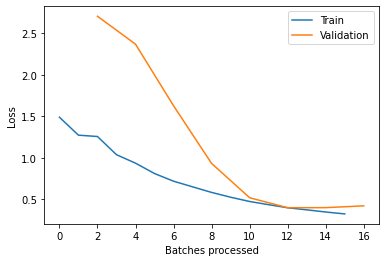

In [22]:
learn.fit_one_cycle(8)
learn.recorder.plot_losses()

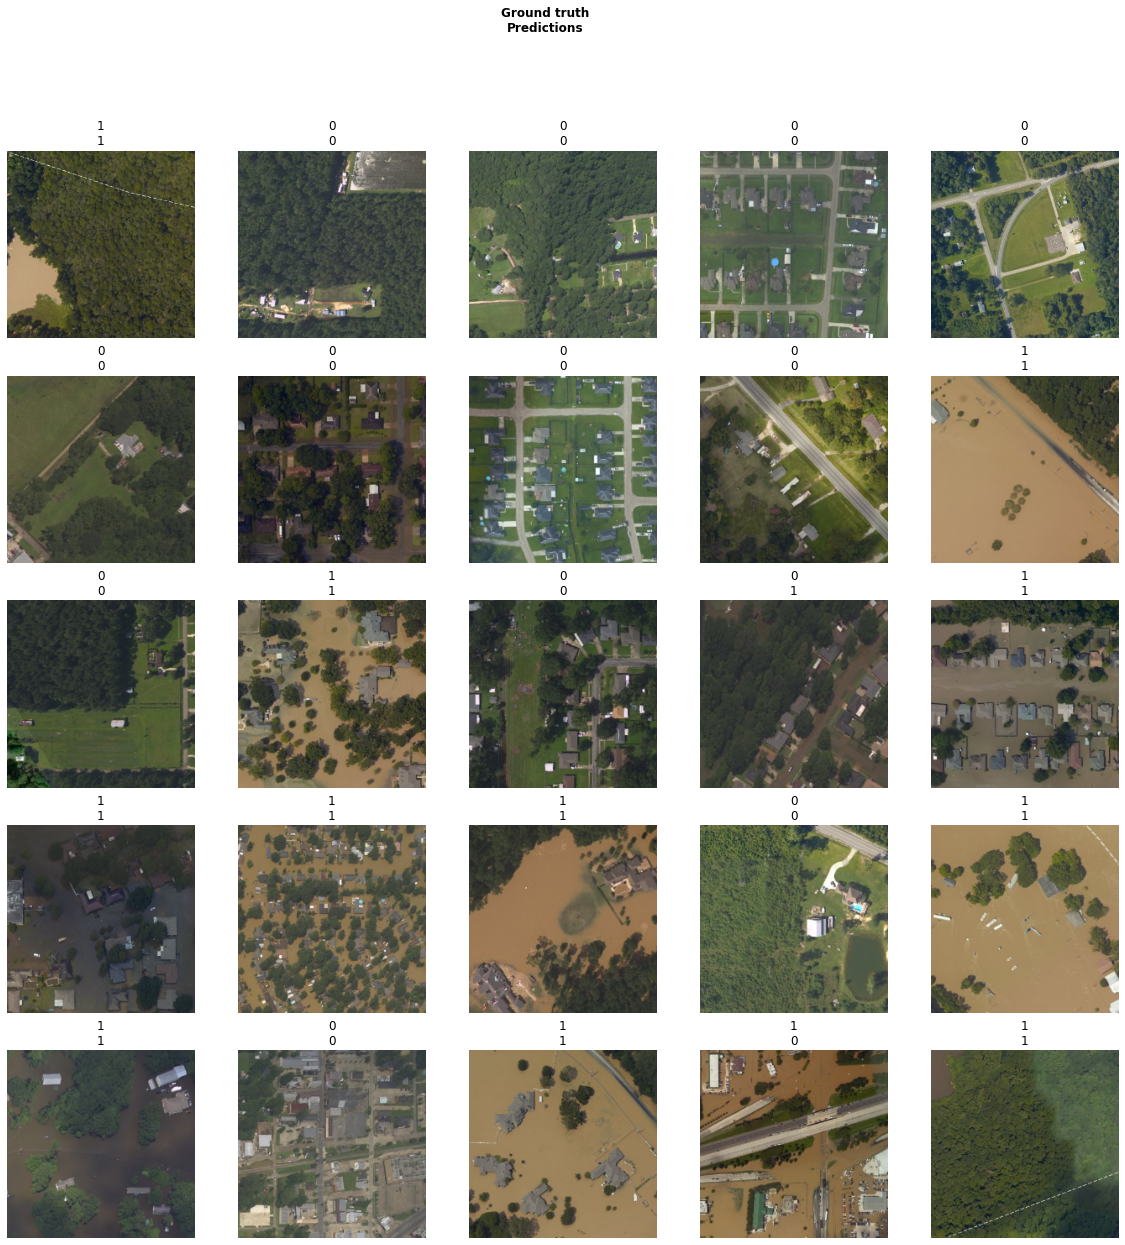

In [23]:
learn.show_results()

We dont have many data for performing deeplearning. Even though the model was able to give high accuracy, there is a chance that it is overfitting.
May be we can use augmentation for generating more samples.